# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
news_api = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = news_api.get_everything(
    q = 'Bitcoin',
    language = 'en',
    sort_by = 'relevancy'
)

In [5]:
# Fetch the Ethereum news articles
ethereum_news = news_api.get_everything(
    q = 'Ethereum',
    language = 'en',
    sort_by = 'relevancy'
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiment.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
        
    except AttributeError:
            pass
        
#Setting up and organizing the Bitcoin DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
1,2021-03-03,,0.0000,0.000,0.000,0.000
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860
3,2021-02-12,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852
4,2021-02-13,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.000,0.899


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiment.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
        
    except AttributeError:
            pass
        
#Setting up and organizing the Bitcoin DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)
cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.258483,0.068500,0.008444,0.867500
std,0.341162,0.070864,0.024663,0.227035
min,-0.361200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.856250
50%,0.221350,0.068000,0.000000,0.917500
75%,0.559650,0.110000,0.000000,0.989500
max,0.831600,0.246000,0.082000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.237070,0.074700,0.019200,0.906100
std,0.370410,0.062607,0.043104,0.070778
min,-0.458800,0.000000,0.000000,0.754000
25%,0.000000,0.022500,0.000000,0.861750
50%,0.307100,0.073500,0.000000,0.915500
75%,0.473275,0.096500,0.000000,0.946750
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum is the coin with the highest mean positive score.

Q: Which coin had the highest compound score?

A: Both coins have the same maximum compound score

Q. Which coin had the highest positive score?

A: Both coins have the same maximum positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
add_stop_words = ['announced', 'today', 'said',]

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z]')
    re_clean = regex.sub(' ', text)
    

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    lower = [word.lower() for word in lem]
     
    # Remove the stop words
    tokens = [word.lower() for word in lower if word.lower() not in stop_words.union(add_stop_words)]
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = [tokenizer(i) for i in bitcoin_df['text']]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
1,2021-03-03,,0.0000,0.000,0.000,0.000,[]
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860,"[bitcoin, future, morning, hit, time, high, va..."
3,2021-02-12,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852,"[jack, dorsey, jay, z, create, bitcoin, endowm..."
4,2021-02-13,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.000,0.899,"[case, havent, noticed, bitcoins, bit, moment,..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = [tokenizer(i) for i in ethereum_df['text']]
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[nfts, non, fungible, token, scarce, digital, ..."
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, christie, auction, digital, artwork, b..."
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,"[attempting, get, ahead, cryptocurrency, miner..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokenized = tokenizer(bitcoin_df.text.str.cat())
N = 2
bitcoin_count = Counter(ngrams(bitcoin_tokenized, N))
bitcoin_count.most_common(10)

[(('char', 'reuters'), 4),
 (('reuters', 'staff'), 4),
 (('cryptocurrency', 'exchange'), 2),
 (('time', 'high'), 2),
 (('friday', 'char'), 2),
 (('investment', 'giveaway'), 2),
 (('staff', 'file'), 2),
 (('file', 'photo'), 2),
 (('virtual', 'currency'), 2),
 (('illustration', 'taken'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_tokenized = tokenizer(ethereum_df.text.str.cat())
N = 2
ethereum_count = Counter(ngrams(ethereum_df, N))
ethereum_count.most_common(10)

[(('date', 'text'), 1),
 (('text', 'compound'), 1),
 (('compound', 'positive'), 1),
 (('positive', 'negative'), 1),
 (('negative', 'neutral'), 1),
 (('neutral', 'tokens'), 1)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_ten = token_count(bitcoin_tokenized, 10)
bitcoin_ten

[('char', 17),
 ('bitcoin', 13),
 ('reuters', 10),
 ('ha', 8),
 ('cryptocurrency', 7),
 ('staff', 4),
 ('illustration', 4),
 ('exchange', 3),
 ('morning', 3),
 ('time', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
ethereum_ten = token_count(ethereum_tokenized, 10)
ethereum_ten

[('char', 20),
 ('reuters', 15),
 ('cryptocurrency', 10),
 ('ethereum', 8),
 ('bitcoin', 8),
 ('new', 7),
 ('ha', 6),
 ('staff', 6),
 ('week', 5),
 ('record', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

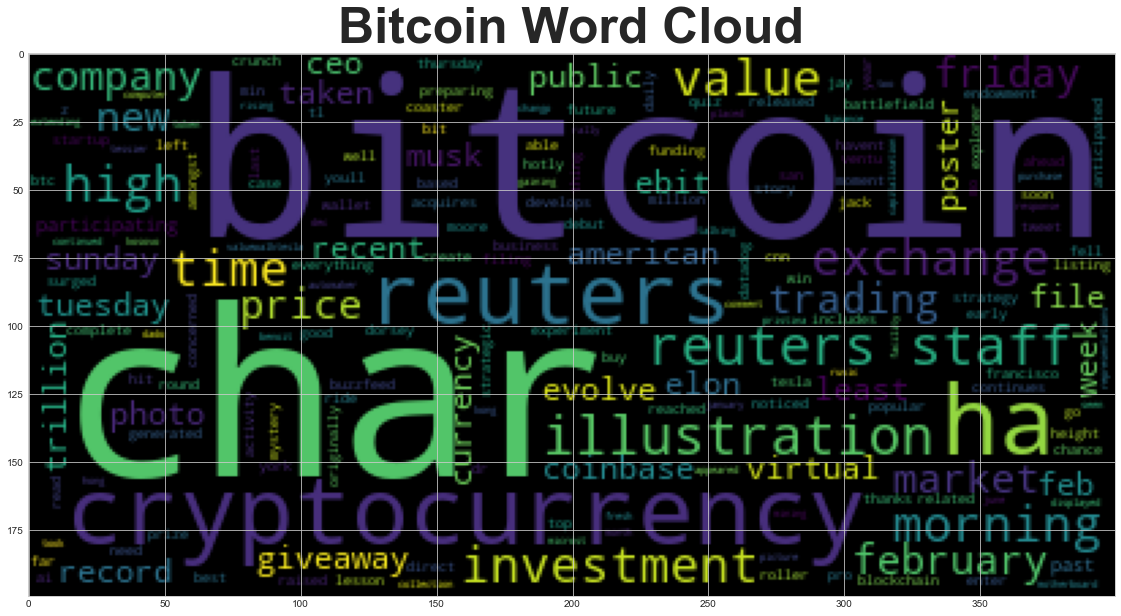

In [22]:
# Generate the Bitcoin word cloud
bitcoin_cloud = WordCloud().generate(' '.join(bitcoin_tokenized))
plt.title('Bitcoin Word Cloud', fontsize = 50, fontweight = 'bold')
plt.imshow(bitcoin_cloud)

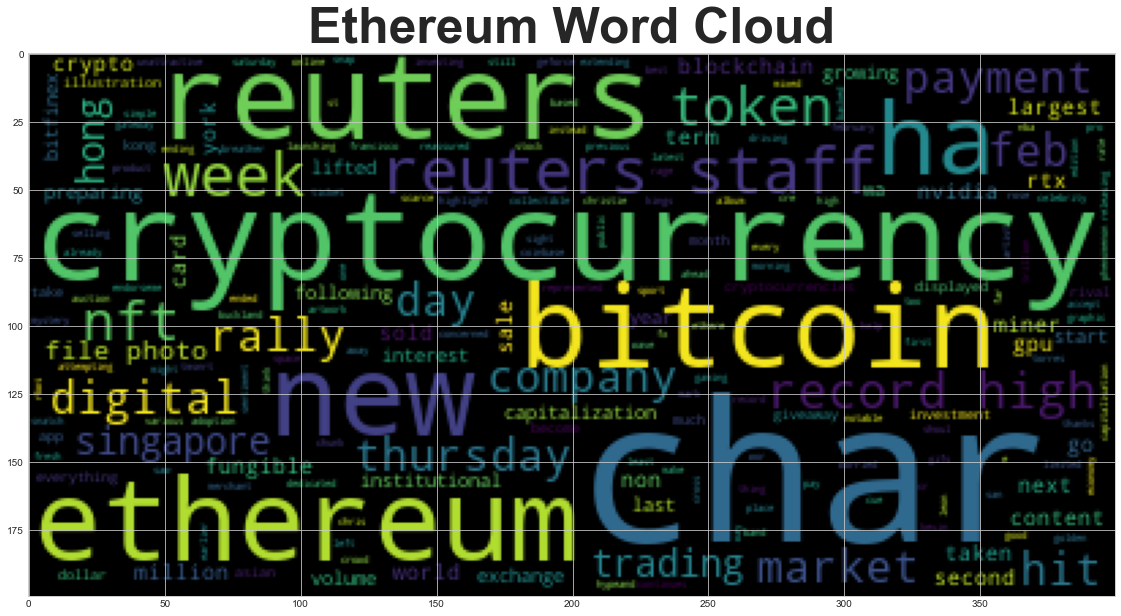

In [23]:
# Generate the Ethereum word cloud
ethereum_cloud = WordCloud().generate(' '.join(ethereum_tokenized))
plt.title('Ethereum Word Cloud', fontsize = 50, fontweight = 'bold')
plt.imshow(ethereum_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
all_textext_bitcoin = ' '.join(bitcoin_df['text'])

In [28]:
# Run the NER processor on all of the text
doc = nlp(all_textext_bitcoin)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [29]:
# Render the visualization
displacy.render(doc, style = 'ent')

In [30]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Coinbase ORG
San Francisco GPE
last year DATE
Thursday DATE
Bitcoin GPE
over $50,000 MONEY
Elon Musks ORG
Jack Dorsey PERSON
Jay Z PERSON
Datadog PERSON
Startup ORG
BuzzFeed ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
the The Complete Bitcoin ORG
BTC ORG
Investment Giveaway PERSON
over $12,000 MONEY
The Bitcoin Investment Giveaway EVENT
New York GPE
CNN ORG
Business)Bitcoin PRODUCT
58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
mo PERSON
Blockchain.com ORG
$120 million MONEY
Moore PERSON
This morning TIME
American NORP
February DATE
19, 2021 DATE
3 min QUANTITY
ValueWalkTesla ORG
Elon Musk ORG
Binance ORG
Changp PERSON
Reuters ORG
Dec. 8, 2017 DATE
REUTERS/Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
January 21, 2021 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
Sunday DATE
two-month DATE
above $1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 D

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_textext_ethereum = ' '.join(ethereum_df['text'])

In [32]:
# Run the NER processor on all of the text
doc = nlp(all_textext_ethereum)

# Add a title to the document
doc.user_data['title'] = 'Ethereum NER'

In [33]:
# Render the visualization
displacy.render(doc, style = 'ent')

In [34]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

these days DATE
Kings PERSON
Leon PERSON
NBA ORG
millions CARDINAL
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
one CARDINAL
Chris Torres PERSON
3060 CARDINAL
GPU ORG
next week DATE
Nvidia ORG
this morning TIME
NEW YORK PERSON
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ORG
the week DATE
1,935.57 MONEY
the week DATE
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex PERSON
Bitfinex Pay PERSON
millions of dollars MONEY
Reuters ORG
SINGAPORE ORG
Reuters ORG
Bitcoin GPE
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
bitcoin GPE
 PERSONuckland
Reuters ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
Reuters ORG
SINGAPORE ORG
Feb 15 DATE
Reuters ORG
Asian NORP
hours TIME
Monday DATE
bitcoin GPE
more than 5% PERCENT
app ORG
more than a y

---